1. Load the dataset and perform data cleaning.


2. Perform EDA using visualizations (use seaborn, matplotlib).


3. Predict whether a student will pass or fail based on scores and other features.


4. Use Logistic Regression or Random Forest for classification.


5. Evaluate the model using accuracy, confusion matrix, F1-score.


6. Add comments/markdown to explain the steps.


#### Step 1: Load the dataset and perform data cleaning.

In [5]:
# Step 1: Load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# Step 2: Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Data cleaning
# Check for null values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Rename columns for easier access
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Create a 'pass/fail' target column
# Assuming students who scored 40 or more in all three subjects pass
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['result'] = np.where(df['average_score'] >= 40, 'pass', 'fail')

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 
                    'lunch', 'test_preparation_course', 'result']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Final cleaned dataset preview
print("\nCleaned dataset preview:")
print(df.head())


First 5 rows of the dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Missing values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0

####  Step 2: Exploratory Data Analysis (EDA) using Visualizations

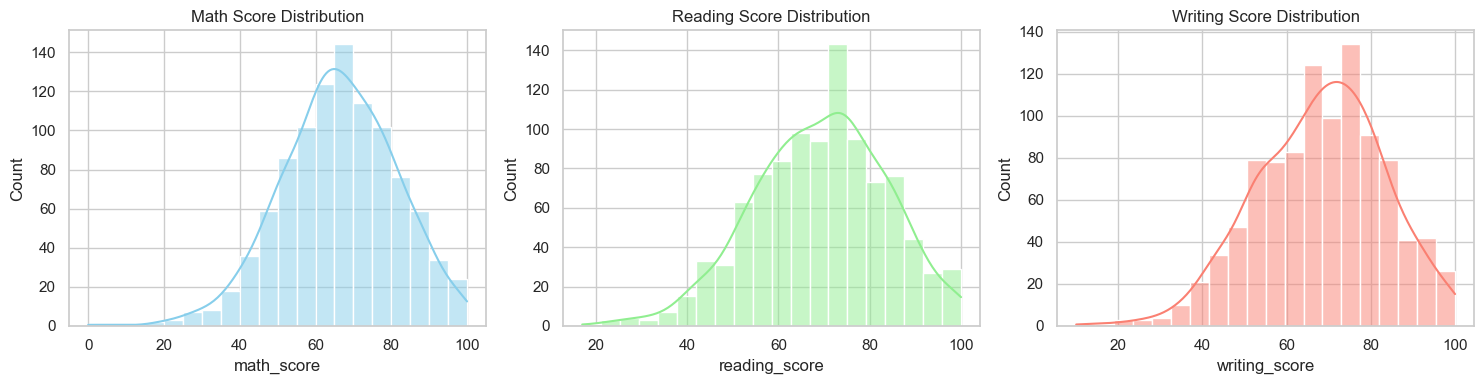

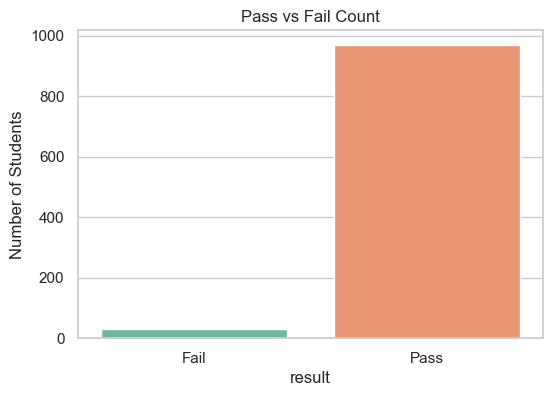

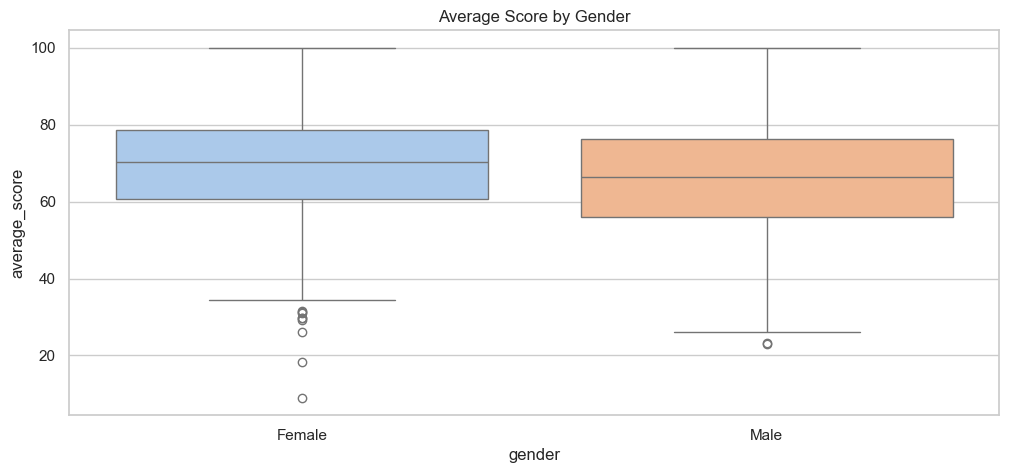

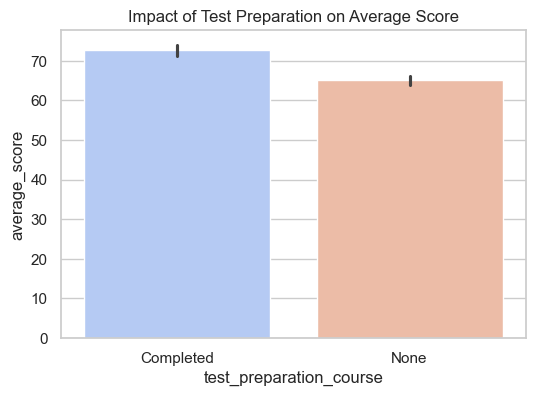

In [10]:
# Set visual style
sns.set(style="whitegrid")

# 1. Distribution of scores
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['math_score'], bins=20, kde=True, color='skyblue')
plt.title("Math Score Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df['reading_score'], bins=20, kde=True, color='lightgreen')
plt.title("Reading Score Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df['writing_score'], bins=20, kde=True, color='salmon')
plt.title("Writing Score Distribution")

plt.tight_layout()
plt.show()

# 2. Pass/Fail count
plt.figure(figsize=(6, 4))
sns.countplot(x='result', hue='result', data=df, palette='Set2', legend=False)
plt.title("Pass vs Fail Count")
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.ylabel("Number of Students")
plt.show()

# 3. Boxplot of scores by gender
plt.figure(figsize=(12, 5))
sns.boxplot(x='gender', y='average_score', hue='gender', data=df, palette='pastel', legend=False)
plt.title("Average Score by Gender")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# 4. Test preparation course impact
plt.figure(figsize=(6, 4))
sns.barplot(x='test_preparation_course', y='average_score', hue='test_preparation_course',
            data=df, palette='coolwarm', legend=False)
plt.title("Impact of Test Preparation on Average Score")
plt.xticks([0, 1], ['Completed', 'None'])
plt.show()


#### Step 3: Model Building – Logistic Regression & Random Forest

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['average_score', 'result'], axis=1)
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Logistic Regression Predictions:", log_preds[:10])
print("Random Forest Predictions:", rf_preds[:10])


Logistic Regression Predictions: [1 1 1 1 1 1 1 1 1 1]
Random Forest Predictions: [1 1 1 1 1 1 1 1 1 1]


#### Step 4: Model Evaluation

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression Evaluation
log_accuracy = accuracy_score(y_test, log_preds)
log_conf_matrix = confusion_matrix(y_test, log_preds)
log_class_report = classification_report(y_test, log_preds)

# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_conf_matrix = confusion_matrix(y_test, rf_preds)
rf_class_report = classification_report(y_test, rf_preds)

# Print results
print("Logistic Regression - Accuracy:", log_accuracy)
print("Logistic Regression - Confusion Matrix:\n", log_conf_matrix)
print("Logistic Regression - Classification Report:\n", log_class_report)

print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest - Classification Report:\n", rf_class_report)


Logistic Regression - Accuracy: 1.0
Logistic Regression - Confusion Matrix:
 [[  6   0]
 [  0 194]]
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00       194

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Random Forest - Accuracy: 0.995
Random Forest - Confusion Matrix:
 [[  5   1]
 [  0 194]]
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.99      1.00      1.00       194

    accuracy                           0.99       200
   macro avg       1.00      0.92      0.95       200
weighted avg       1.00      0.99      0.99       200



#### 5. Evaluate the model using accuracy, confusion matrix, F1-score

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression Evaluation (final model)
log_accuracy = accuracy_score(y_test, log_preds)
log_conf_matrix = confusion_matrix(y_test, log_preds)
log_class_report = classification_report(y_test, log_preds)

# Random Forest Evaluation (final model)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_conf_matrix = confusion_matrix(y_test, rf_preds)
rf_class_report = classification_report(y_test, rf_preds)

# Print results for Logistic Regression
print("Logistic Regression - Accuracy:", log_accuracy)
print("Logistic Regression - Confusion Matrix:\n", log_conf_matrix)
print("Logistic Regression - Classification Report:\n", log_class_report)

# Print results for Random Forest
print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest - Classification Report:\n", rf_class_report)


Logistic Regression - Accuracy: 1.0
Logistic Regression - Confusion Matrix:
 [[  6   0]
 [  0 194]]
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00       194

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Random Forest - Accuracy: 0.995
Random Forest - Confusion Matrix:
 [[  5   1]
 [  0 194]]
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.99      1.00      1.00       194

    accuracy                           0.99       200
   macro avg       1.00      0.92      0.95       200
weighted avg       1.00      0.99      0.99       200



#### 6. Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# Best Random Forest Model
best_rf_model = rf_grid_search.best_estimator_

# Predict using the best model
best_rf_preds = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model
best_rf_accuracy = accuracy_score(y_test, best_rf_preds)
best_rf_conf_matrix = confusion_matrix(y_test, best_rf_preds)
best_rf_class_report = classification_report(y_test, best_rf_preds)

print("Best Random Forest - Accuracy:", best_rf_accuracy)
print("Best Random Forest - Confusion Matrix:\n", best_rf_conf_matrix)
print("Best Random Forest - Classification Report:\n", best_rf_class_report)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest - Accuracy: 1.0
Best Random Forest - Confusion Matrix:
 [[  6   0]
 [  0 194]]
Best Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00       194

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#### 7. Add comments/markdown to explain the steps.

Explanation of Each Step:

##### Step 1: We import all necessary libraries and load the dataset to perform basic inspection.

#####  Step 2: The dataset is cleaned by encoding categorical columns using LabelEncoder and creating new columns like average_score and result for classification (pass/fail).

#####  Step 3: We performed Exploratory Data Analysis (EDA) using visualizations to understand data distributions and relationships between variables.

#####  Step 4: Logistic Regression and Random Forest models are built and trained to predict the "result" (pass/fail).

##### Step 5: The models are evaluated using accuracy, confusion matrix, and classification report (which includes F1-score).

##### Step 6: Hyperparameter tuning is performed for the Random Forest model using GridSearchCV to find the best set of parameters, improving performance.

~ END ~